Name: Carl Mario Britto

SID: 3034330576

Mail: carl2mario@berkeley.edu

# Python Configuration and Data Loading

In [1]:
from scipy import io
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")


for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


# Data Partitioning

* For the MNIST dataset, write code that sets aside 10,000 training images as a validation set.
* For the spam dataset, write code that sets aside 20% of the training data as a validation set.
* For the CIFAR-10 dataset, write code that sets aside 5,000 training images as a validation set.

In [1]:
# Load .mat files
import scipy.io
spam = scipy.io.loadmat('data/spam_data.mat')
mnist = scipy.io.loadmat('data/mnist_data.mat')
cifar = scipy.io.loadmat('data/cifar10_data.mat')

In [2]:
# Import libraries to manipulate data
import pandas as pd
import numpy as np

In [3]:
# Convert to DataFrame and select required set of data
mnist_df = pd.DataFrame(mnist['training_data'])
mnist_df['label'] = mnist['training_labels']

mnist_test = pd.DataFrame(mnist['test_data'])

# Sample method to shuffle data
mnist_df = mnist_df.sample(frac=1).reset_index(drop=True)
mnist_train = mnist_df[:-10000]
mnist_val = mnist_df[-10000:]

In [4]:
# Convert to DataFrame and select required set of data
spam_df = pd.DataFrame(spam['training_data'])
spam_df['label'] = spam['training_labels']

spam_test = pd.DataFrame(spam['test_data'])

# Sample method to shuffle data
spam_df = spam_df.sample(frac=1).reset_index(drop=True)
spam_train = spam_df[:int(-0.2*len(spam_df))]
spam_val = spam_df[int(-0.2*len(spam_df)):]

In [8]:
# Convert to DataFrame and select required set of data
cifar_df = pd.DataFrame(cifar['training_data'])
cifar_df['label'] = cifar['training_labels']

cifar_test = pd.DataFrame(cifar['test_data'])

# Sample method to shuffle data
cifar_df = cifar_df.sample(frac=1).reset_index(drop=True)
cifar_train = cifar_df[:-5000]
cifar_val = cifar_df[-5000:]

# Support Vector Machines: Coding

In [7]:
# Import svm model
import matplotlib.pyplot as plt
from sklearn import svm

# Import classification accuracy
from sklearn.metrics import accuracy_score

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# Plotting
%matplotlib inline

## MNIST

In [8]:
train_list = [100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_list = []
accuracy_list_train = []

# Create a svm Classifier
clf = svm.SVC(kernel='linear')  # Linear Kernel

for i in train_list:
    # Train the model using the training set
    clf.fit(mnist_train.iloc[:i, :-1], mnist_train.iloc[:i, -1:])
    accuracy_list_train.append(
        clf.score(mnist_train.iloc[:i, :-1], mnist_train.iloc[:i, -1:]))

    # Predict the response for validation set
    mnist_pred = clf.predict(mnist_val.iloc[:, :-1])
    score = accuracy_score(mnist_val.iloc[:, -1:], mnist_pred)
    accuracy_list.append(score)
    print('Accuracy when using ', i, 'training examples is ', score)

Accuracy when using  100 training examples is  0.7113
Accuracy when using  200 training examples is  0.7854
Accuracy when using  500 training examples is  0.8423
Accuracy when using  1000 training examples is  0.8756
Accuracy when using  2000 training examples is  0.8868
Accuracy when using  5000 training examples is  0.9018
Accuracy when using  10000 training examples is  0.9061


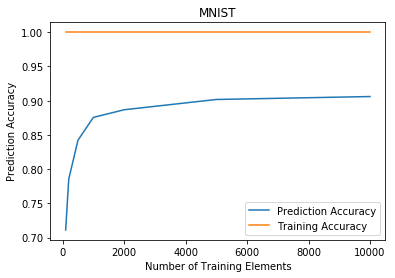

In [9]:
plt.plot(train_list, accuracy_list, label='Prediction Accuracy')
plt.plot(train_list, accuracy_list_train, label='Training Accuracy')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.title('MNIST')
plt.xlabel('Number of Training Elements')
plt.show()

## Spam

In [10]:
train_list = [100, 200, 500, 1000, 2000, len(spam_df)]
accuracy_list = []
accuracy_list_train = []

# Create a svm Classifier
clf = svm.SVC(kernel='linear')  # Linear Kernel

for i in train_list:
    # Train the model using the training set
    clf.fit(spam_train.iloc[:i, :-1], spam_train.iloc[:i, -1:])
    accuracy_list_train.append(
        clf.score(spam_train.iloc[:i, :-1], spam_train.iloc[:i, -1:]))

    # Predict the response for validation set
    spam_pred = clf.predict(spam_val.iloc[:, :-1])
    score = accuracy_score(spam_val.iloc[:, -1:], spam_pred)
    accuracy_list.append(score)
    print('Accuracy when using ', i, 'training examples is ', score)

Accuracy when using  100 training examples is  0.7833655705996132
Accuracy when using  200 training examples is  0.7920696324951644
Accuracy when using  500 training examples is  0.8017408123791102
Accuracy when using  1000 training examples is  0.8075435203094777
Accuracy when using  2000 training examples is  0.8123791102514507
Accuracy when using  5172 training examples is  0.8133462282398453


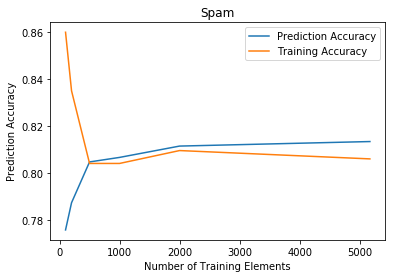

In [12]:
plt.plot(train_list, accuracy_list, label='Prediction Accuracy')
plt.plot(train_list, accuracy_list_train, label='Training Accuracy')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.title('Spam')
plt.xlabel('Number of Training Elements')
plt.show()

## Cifar-10

In [13]:
train_list = [100, 200, 500, 1000, 2000, 5000]
accuracy_list = []
accuracy_list_train = []

# Create a svm Classifier
clf = svm.SVC(kernel='linear')  # Linear Kernel

for i in train_list:
    # Train the model using the training set
    clf.fit(cifar_train.iloc[:i, :-1], cifar_train.iloc[:i, -1:])
    accuracy_list_train.append(
        clf.score(cifar_train.iloc[:i, :-1], cifar_train.iloc[:i, -1:]))

    # Predict the response for validation set
    cifar_pred = clf.predict(cifar_val.iloc[:, :-1])
    score = accuracy_score(cifar_val.iloc[:, -1:], cifar_pred)
    accuracy_list.append(score)
    print('Accuracy when using ', i, 'training examples is ', score)

Accuracy when using  100 training examples is  0.2446
Accuracy when using  200 training examples is  0.2542
Accuracy when using  500 training examples is  0.2796
Accuracy when using  1000 training examples is  0.2894
Accuracy when using  2000 training examples is  0.3112
Accuracy when using  5000 training examples is  0.305


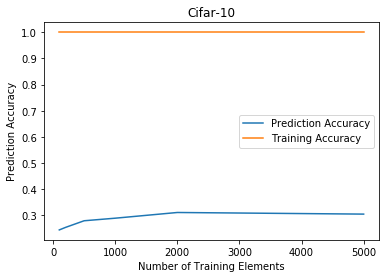

In [14]:
plt.plot(train_list, accuracy_list, label='Prediction Accuracy')
plt.plot(train_list, accuracy_list_train, label='Training Accuracy')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.title('Cifar-10')
plt.xlabel('Number of Training Elements')
plt.show()

# Hyperparameter Tuning

In [7]:
C_list = [1e-7, 1e-3, 1, 10]
accuracy_list = []
score_C = 0
size = 10000

for i in C_list:
    # Create a svm Classifier
    clf = svm.SVC(C=i, kernel='linear')  # Linear Kernel

    # Train the model using the training set
    clf.fit(mnist_train.iloc[:size, :-1], mnist_train.iloc[:size, -1:])

    # Predict the response for validation set
    mnist_pred = clf.predict(mnist_val.iloc[:, :-1])
    score = accuracy_score(mnist_val.iloc[:, -1:], mnist_pred)
    accuracy_list.append(score)

    print('Accuracy when using ', i, ' as C parameter is', score)
    if score > score_C:
        score_C = score
        C_mnist = i
print('Best Accuracy is when achieved using ', C_mnist,
      ' as C parameter and accuracy is', score_C)

Accuracy when using  1e-07  as C parameter is 0.9238
Accuracy when using  0.001  as C parameter is 0.9087
Accuracy when using  1  as C parameter is 0.9087
Accuracy when using  10  as C parameter is 0.9087
Best Accuracy is when achieved using  1e-07  as C parameter and accuracy is 0.9238


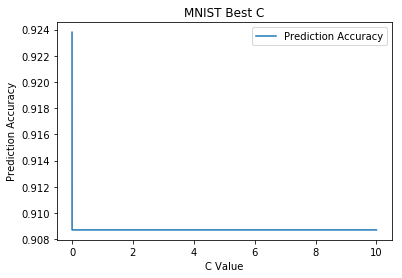

In [9]:
plt.plot(C_list, accuracy_list, label='Prediction Accuracy')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.title('MNIST Best C')
plt.xlabel('C Value')
plt.show()

# K-Fold Cross-Validation

In [9]:
k = 5
C_list = [1e-1, 1, 10, 20]
score_C = 0
accuracy_list = []

a = len(spam_df)
spam_folds = [0, 0, 0, 0, 0]
for k in range(5):
    spam_folds[k] = spam_df.iloc[int(k*a/5):int((k+1)*a/5), :]

for i in C_list:
    accuracy_list_k = []

    # Create a svm Classifier
    clf = svm.SVC(C=i, kernel='linear')  # Linear Kernel
    b = -1
    for j in range(5):
        b += 1
        for l in range(5):
            if j != b:
                spam_train.append(spam_folds[j])
            else:
                spam_val = spam_folds[b]

        # Train the model using the training set
        clf.fit(spam_train.iloc[:, :-1], spam_train.iloc[:, -1:])

        # Predict the response for validation set
        spam_pred = clf.predict(spam_val.iloc[:, :-1])
        score_k = accuracy_score(spam_val.iloc[:, -1:], spam_pred)
        accuracy_list_k.append(score_k)
        #print('Accuracy when using ',i,' as C parameter is',score)

    # Find average of all (k-1) training accuracies
    score = sum(accuracy_list_k) / len(accuracy_list_k)
    accuracy_list.append(score)
    print('Cross-Validation Accuracy when using ',
          i, ' as C parameter is', score)

    if score > score_C:
        score_C = score
        C_spam = i
print('Best Accuracy is when achieved using ', C_spam,
      ' as C parameter and accuracy is', score_C)

Cross-Validation Accuracy when using  0.1  as C parameter is 0.7992978816845607
Cross-Validation Accuracy when using  1  as C parameter is 0.8043259608106972
Cross-Validation Accuracy when using  10  as C parameter is 0.8054865023967708
Cross-Validation Accuracy when using  20  as C parameter is 0.8050998420841159
Best Accuracy is when achieved using  10  as C parameter and accuracy is 0.8054865023967708


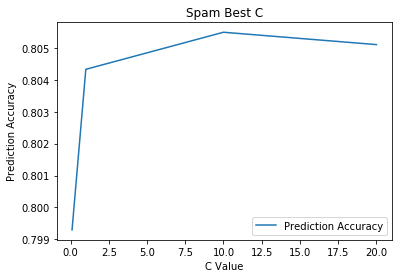

In [10]:
plt.plot(C_list, accuracy_list, label='Prediction Accuracy')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.title('Spam Best C')
plt.xlabel('C Value')
plt.show()

# Kaggle

In [11]:
# Create a svm Classifier
C_mnist = 1e-7
clf = svm.SVC(C=C_mnist, kernel='linear')  # Linear Kernel

# Train the model using the training set
clf.fit(mnist_train.iloc[:10000, :-1], mnist_train.iloc[:10000, -1:])

# Predict the response for test set
mnist_pred = clf.predict(mnist_test)

# Usage results_to_csv(clf.predict(X_test))


def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1.
    df.to_csv('mnist.csv', index_label='Id')


results_to_csv(mnist_pred)

In [14]:
# Create a svm Classifier
clf = svm.SVC(C=C_spam, kernel='linear')  # Linear Kernel

# Train the model using the training set
clf.fit(spam_train.iloc[:, :-1], spam_train.iloc[:, -1:])

# Predict the response for test set
spam_pred = clf.predict(spam_test)

# Usage results_to_csv(clf.predict(X_test))


def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1.
    df.to_csv('spam.csv', index_label='Id')


results_to_csv(spam_pred)

In [15]:
# Create a svm Classifier
clf = svm.SVC(kernel='linear')  # Linear Kernel

# Train the model using the training set
clf.fit(cifar_train.iloc[:5000, :-1], cifar_train.iloc[:5000, -1:])

# Predict the response for test set
cifar_pred = clf.predict(cifar_test)

# Usage results_to_csv(clf.predict(X_test))


def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1.
    df.to_csv('cifar.csv', index_label='Id')


results_to_csv(cifar_pred)

# Theory of Hard-Margin Support Vector Machines